In [41]:
import matplotlib.pyplot as plt
import time
import random
from numba import jit , uint64

In [42]:
@jit(uint64(uint64 , uint64 ) ,nopython=True)
def gcd_Binary(a, b):    
	if (a == b):
    		return a

	if (a == 0):
		return b

	if (b == 0):
		return a

	# look for factors of 2 if a is even
	if ((~a & 1) == 1):

		# b is odd
		if ((b & 1) == 1):
			return gcd_Binary(a >> 1, b)
		else:
			# both a and b are even
			return (gcd_Binary(a >> 1, b >> 1) << 1)

	# a is odd, b is even
	if ((~b & 1) == 1):
		return gcd_Binary(a, b >> 1)

	# reduce larger number
	if (a > b):
		return gcd_Binary((a - b) >> 1, b)
		
	return gcd_Binary((b - a) >> 1, a)
	
@jit(uint64(uint64 , uint64 ) ,nopython=True)
def gcd_Euclid(a, b): 
    if a == 0 :
        return b 
    return gcd_Euclid(b%a, a)

In [43]:
Digits = []
for i in range(1,20):
    Digits.append(i+1)

In [38]:
Euclid_Time = []

for i in range(1,19): 
	start = time.time_ns()	
	for j in range(0,10000): 
		rand1 = random.randint(10 ** i,(10 ** (i+1))-1)
		rand2 = random.randint(10 ** i,(10 ** (i+1))-1)
		gcd_Euclid(rand1, rand2 )
	Euclid_Time.append((time.time_ns() - start)// (10000* 1000) )	

# for the case that  20 digits
start = time.time_ns()	
for j in range(0,10000): 
	rand1 = random.randint(10 ** 19, ( 2 << 63 )-1 ) 
	rand2 = random.randint(10 ** 19, ( 2 << 63 )-1 ) 
	gcd_Euclid(rand1, rand2 )
Euclid_Time.append((time.time_ns() - start)// (10000* 1000))

print(Euclid_Time)

[6, 8, 6, 5, 6, 6, 6, 6, 8, 7, 6, 8, 7, 6, 7, 7, 7, 7, 5]


In [39]:
Binary_Time = []

for i in range(1,19): 
	start = time.time_ns()	
	for j in range(0,10000): 
		rand1 = random.randint(10 ** i,(10 ** (i+1))-1)
		rand2 = random.randint(10 ** i,(10 ** (i+1))-1)
		gcd_Binary(rand1, rand2 )
	Binary_Time.append((time.time_ns() - start)// (10000* 1000))
	
# for the case that  20 digits
start = time.time_ns()	
for j in range(0,10000): 
	rand1 = random.randint(10 ** 19, ( 2 << 63 )-1 ) 
	rand2 = random.randint(10 ** 19, ( 2 << 63 )-1 ) 
	gcd_Binary(rand1, rand2 )
Binary_Time.append((time.time_ns() - start)// (10000* 1000))

print(Binary_Time)

[9, 7, 9, 9, 10, 12, 12, 12, 13, 13, 15, 9, 8, 9, 6, 9, 7, 6, 6]


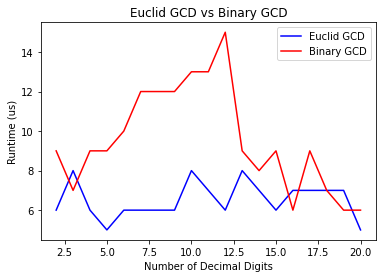

In [40]:
plt.plot(Digits, Euclid_Time , color='b', label='Euclid GCD')
plt.plot(Digits, Binary_Time , color='r', label='Binary GCD')

plt.xlabel("Number of Decimal Digits")
plt.ylabel("Runtime (us)")
plt.title("Euclid GCD vs Binary GCD")
plt.legend()
plt.show()